In [1]:
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
from src.trading_bot import *

ModuleNotFoundError: No module named 'pandas'

In [69]:
ticker = "MCD"
start_date = "2015-01-01"
end_date = "2024-04-01"
df = download_data(ticker, start_date, end_date)


# df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")


[*********************100%%**********************]  1 of 1 completed


In [70]:
df.set_index(pd.Series(range(len(df))), inplace=True)

In [ ]:
df.columns

In [71]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

/Users/system/Documents/algo_trading/venv_trading_bot/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


(2325, 6)

In [78]:
prediction_length = 24 
forecast = pipeline.predict(
    context=torch.tensor(df.values[:-prediction_length, :]),
    prediction_length=prediction_length,
    num_samples=20,
)


/Users/system/Documents/algo_trading/venv_trading_bot/lib/python3.12/site-packages/chronos/chronos.py:181: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BucketizationUtils.h:34.)
  torch.bucketize(


KeyboardInterrupt: 

In [62]:
df = df [-100 :].set_index(pd.Series(range(100)))
df

,Open,High,Low,Close,Adj Close,Volume
0,267.559998,268.609985,265.489990,267.869995,263.060181,3126200
1,268.010010,269.109985,267.299988,268.910004,264.081512,3090600
2,268.799988,269.790009,268.109985,268.670013,263.845856,2360800
3,268.829987,270.059998,267.279999,267.489990,262.687012,2223300
4,268.239990,268.339996,265.940002,266.910004,262.117432,2501700
...,...,...,...,...,...,...
95,283.880005,284.390015,282.119995,282.630005,280.806885,2556100
96,280.000000,280.579987,277.640015,278.619995,276.822723,2985500
97,279.220001,279.450012,277.170013,278.619995,276.822723,2572100
98,278.100006,282.299988,278.100006,282.019989,280.200806,2605000


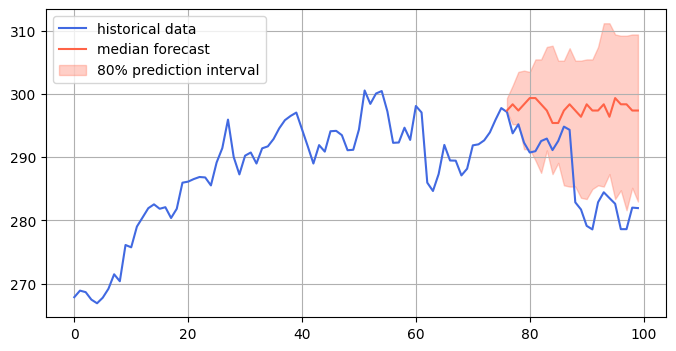

In [63]:
forecast_index = range(len(df) - prediction_length, len(df))
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["Close"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()
